# Analysing SAE trained on pretrained audio representations

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import h5py

### MSE on the validation set

In [2]:
exp_root = "/lium/raid-b/tmario/train/SAE/ssl"
exp_list = ["010_ast_esc50_SAE_top-k_2048_95_seed_42",
            "011_ast_esc50_SAE_top-k_2048_90_seed_42",
            "012_ast_esc50_SAE_top-k_2048_85_seed_42",
            "013_ast_esc50_SAE_top-k_2048_80_seed_42",
            "014_ast_esc50_SAE_top-k_2048_75_seed_42"]

extract = {}
all_mse = []
var_mse = []
for exp in exp_list:
    ff = os.path.join(exp_root, exp, "extract_rep_10_12_-1.h5")
    local = {}
    with h5py.File(ff, "r") as f:
        for k in f.keys():
            data = f[k][()]
            local[k] = data
            if k == "mse":
                print(f"MSE shape {data.shape=}")
                all_mse.append(np.mean(data,axis=0))
                var_mse.append(np.std(data, axis=0))
    extract[exp[:2]] = local


MSE shape data.shape=(400, 3)
MSE shape data.shape=(400, 3)
MSE shape data.shape=(400, 3)
MSE shape data.shape=(400, 3)
MSE shape data.shape=(400, 3)


In [3]:
sparsity = list(range(95,70,-5))
all_mse = np.array(all_mse).T
var_mse = np.array(var_mse).T
print(all_mse.shape)


(3, 5)


Text(0.5, 0, 'Sparsity (%)')

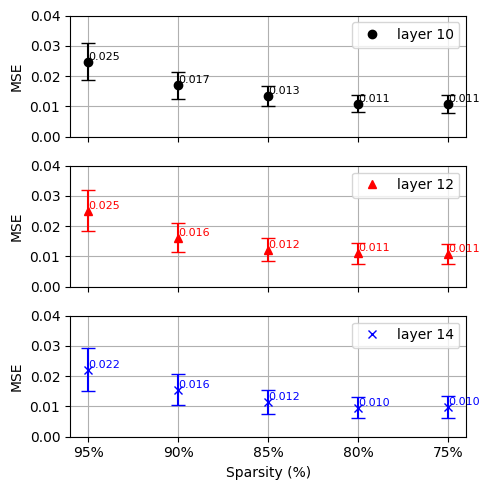

In [17]:

fig, axs = plt.subplots(3,1,figsize=(5,5),layout='tight', sharex=True)
colors = ['k', 'r', 'b']
markers = ['o', '^', 'x']
indexes = [10, 12, 14]
for ll, (ax, mse_l, std_mse_l) in enumerate(zip(axs, all_mse, var_mse)):
    ax.plot(sparsity, mse_l, marker=markers[ll], linestyle=" ", color=colors[ll], label=f"layer {indexes[ll]}")
    ax.errorbar(sparsity, mse_l, yerr=std_mse_l, fmt='none', ecolor=colors[ll], capsize=5)
    for x, y in zip(sparsity, mse_l):
        ax.text(x, y, f"{y:.3f}", color=colors[ll], fontsize=8, va='bottom', ha='left')
    ax.grid()
    ax.set_ylabel("MSE")
    ax.legend()
    ax.set_xticks(sparsity)
    ax.set_xticklabels([f"{s}%" for s in sparsity])
    ax.invert_xaxis()
    ax.set_ylim((0, 0.04))
ax.set_xlabel("Sparsity (%)")



### MSE on the test set

In [12]:
exp_root = "/lium/raid-b/tmario/train/SAE/ssl"
exp_list = ["010_ast_esc50_SAE_top-k_2048_95_seed_42",
            "011_ast_esc50_SAE_top-k_2048_90_seed_42",
            "012_ast_esc50_SAE_top-k_2048_85_seed_42",
            "013_ast_esc50_SAE_top-k_2048_80_seed_42",
            "014_ast_esc50_SAE_top-k_2048_75_seed_42"]

extract = {}
all_mse = []
var_mse = []
for exp in exp_list:
    ff = os.path.join(exp_root, exp, "extract_rep_test_10_12_-1.h5")
    local = {}
    with h5py.File(ff, "r") as f:
        for k in f.keys():
            data = f[k][()]
            local[k] = data
            if k == "mse":
                print(f"MSE shape {data.shape=}")
                all_mse.append(np.mean(data,axis=0))
                var_mse.append(np.std(data, axis=0))
    extract[exp[:2]] = local


MSE shape data.shape=(400, 3)
MSE shape data.shape=(400, 3)
MSE shape data.shape=(400, 3)
MSE shape data.shape=(400, 3)
MSE shape data.shape=(400, 3)


In [13]:
sparsity = list(range(95,70,-5))
all_mse = np.array(all_mse).T
var_mse = np.array(var_mse).T
print(all_mse.shape)


(3, 5)


Text(0.5, 0, 'Sparsity (%)')

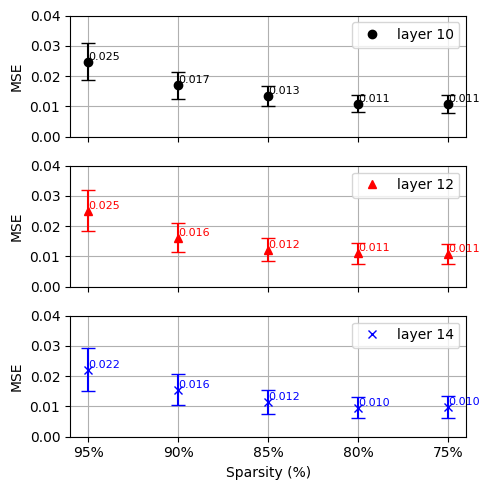

In [18]:
fig, axs = plt.subplots(3,1,figsize=(5,5),layout='tight', sharex=True)
colors = ['k', 'r', 'b']
markers = ['o', '^', 'x']
indexes = [10, 12, 14]
for ll, (ax, mse_l, std_mse_l) in enumerate(zip(axs, all_mse, var_mse)):
    ax.plot(sparsity, mse_l, marker=markers[ll], linestyle=" ", color=colors[ll], label=f"layer {indexes[ll]}")
    ax.errorbar(sparsity, mse_l, yerr=std_mse_l, fmt='none', ecolor=colors[ll], capsize=5)
    for x, y in zip(sparsity, mse_l):
        ax.text(x, y, f"{y:.3f}", color=colors[ll], fontsize=8, va='bottom', ha='left')
    ax.grid()
    ax.set_ylabel("MSE")
    ax.legend()
    ax.set_xticks(sparsity)
    ax.set_xticklabels([f"{s}%" for s in sparsity])
    ax.invert_xaxis()
    ax.set_ylim((0, 0.04))
ax.set_xlabel("Sparsity (%)")

